# Week 7

## Jupyter Notebook


In [1]:
# Cell 2 - Critical Value for F-test
# code created using ChatGPT

from scipy.stats import f

# Set your parameters
alpha = 0.05  # significance level (e.g., for a 95% confidence level)
dof_numerator = 2  # degrees of freedom for the numerator
dof_denominator = 1021  # degrees of freedom for the denominator

# Calculate the critical value
critical_value = f.ppf(1 - alpha, dof_numerator, dof_denominator)
print("Critical value:", critical_value)

Critical value: 3.004539317904942


In [2]:
# Cell 3 - Load Data
from IPython.display import display, HTML, Latex
import pandas as pd
import statsmodels.formula.api as sm
display(HTML("<h2>Concrete Data set</h2>"))
df = pd.read_excel('Concrete_Data.xls')
# partition dataframe into 2 dataframes
y=df.drop(['cement','slag','flyAsh','water','plasticizer','coarse','fine','age'], axis=1)
print(y.describe())
X=df.drop(['strength'], axis=1)
print(X.describe())
# scale X
from sklearn import preprocessing
display(HTML("<h3>Standardization</h3>"))
std_scaler=preprocessing.StandardScaler().fit(X.values)
X_scaled=std_scaler.transform(X)
X_scaled_df=pd.DataFrame(X_scaled,index=X.index,columns=X.columns)
X_scaled_df.describe()

          strength
count  1030.000000
mean     35.817836
std      16.705679
min       2.331808
25%      23.707115
50%      34.442774
75%      46.136287
max      82.599225
            cement         slag       flyAsh        water  plasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean    281.165631    73.895485    54.187136   181.566359     6.203112   
std     104.507142    86.279104    63.996469    21.355567     5.973492   
min     102.000000     0.000000     0.000000   121.750000     0.000000   
25%     192.375000     0.000000     0.000000   164.900000     0.000000   
50%     272.900000    22.000000     0.000000   185.000000     6.350000   
75%     350.000000   142.950000   118.270000   192.000000    10.160000   
max     540.000000   359.400000   200.100000   247.000000    32.200000   

            coarse         fine          age  
count  1030.000000  1030.000000  1030.000000  
mean    972.918592   773.578883    45.662136  
std      77.753818   

C:\Users\dougl\anaconda3\envs\env_4333\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


,cement,slag,flyAsh,water,plasticizer,coarse,fine,age
count,1.030000e+03,1030.000000,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,9.657862e-17,0.000000,2.759389e-17,3.587206e-16,-2.759389e-17,2.276496e-16,-1.931572e-16,2.069542e-17
std,1.000486e+00,1.000486,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715219e+00,-0.856886,-8.471320e-01,-2.802333e+00,-1.038944e+00,-2.212137e+00,-2.240913e+00,-7.073594e-01
25%,-8.500258e-01,-0.856886,-8.471320e-01,-7.808013e-01,-1.038944e+00,-5.265140e-01,-5.319534e-01,-6.123314e-01
50%,-7.912996e-02,-0.601776,-8.471320e-01,1.608624e-01,2.460198e-02,-6.328926e-02,7.401267e-02,-2.797331e-01
75%,6.589771e-01,0.800751,1.001836e+00,4.888051e-01,6.627297e-01,7.267662e-01,6.291904e-01,1.637312e-01
max,2.477918e+00,3.310688,2.281122e+00,3.065497e+00,4.354156e+00,2.214232e+00,2.733101e+00,5.057677e+00


In [6]:
# Cell 4 - PCA Initial Analysis
# note that interactive plots require pip install ipympl
#
from IPython.display import display, HTML, Latex
import numpy as np
display(HTML("<h1>PCA</h1>"))
from sklearn import decomposition
#set up and execute PCA
pca=decomposition.PCA(n_components=8)
pca.fit(X_scaled_df)
#display eigen values
display(HTML("<h2>Eigenvalues (sorted)</h2>"))
print(pca.explained_variance_)
#display explained variance ratio
display(HTML("<h2> Percent variability explained by each component"))
print(pca.explained_variance_ratio_)
#display cumulative sum of variability explained
display(HTML("<h2> Cumulative Percent variability explained by each component"))
print(np.cumsum(pca.explained_variance_ratio_))
#
import matplotlib.pyplot as plt
%matplotlib widget
plt.plot(np.arange(1,9,1),pca.explained_variance_,'-bo')
plt.show()

[2.28210403 1.41758764 1.3415455  1.01513995 0.95252658 0.79089808
 0.17790128 0.03007148]


[0.28498605 0.17702642 0.16753038 0.1267693  0.11895022 0.09876628
 0.02221607 0.00375529]


[0.28498605 0.46201247 0.62954284 0.75631214 0.87526237 0.97402864
 0.99624471 1.        ]


RuntimeError: 'widget is not a recognised GUI loop or backend name

In [3]:
# Cell 5 - Reduced PCA analysis
pcaReduced=decomposition.PCA(n_components=5)
pcaReduced.fit(X_scaled_df)
#print(pcaReduced.components_)
X_pca=pcaReduced.transform(X_scaled_df)
X_pca_df=pd.DataFrame(X_pca,index=X.index,columns=['pca1','pca2','pca3','pca4','pca5'])
modeling_df=pd.concat([y,X_pca_df],axis=1,join='inner')
#print(modeling_df.describe())
model1 = sm.ols(formula='strength~pca1+pca2+pca3+pca4+pca5',data=modeling_df)
fitted1 = model1.fit()
print(fitted1.summary())

NameError: name 'decomposition' is not defined

In [ ]:
# Cell 6 - calculate VIF and save in data frame
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1=pd.DataFrame()
vif1["VIF Factor"]=[variance_inflation_factor(X_pca_df.values,i) for i in range(X_pca_df.shape[1])]
vif1["Variable"]=X_pca_df.columns
vif1=vif1[["Variable","VIF Factor"]]
vif1

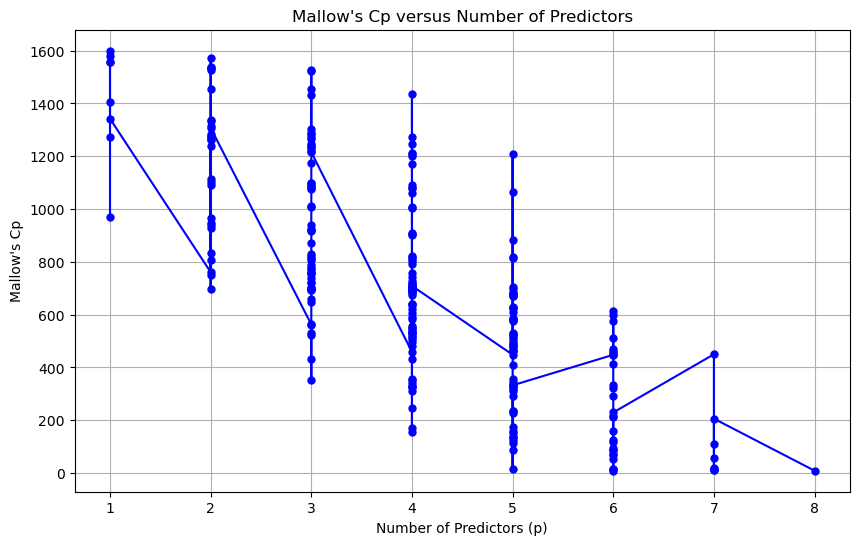

In [4]:
# Cell 7 - Mallow's CP
# updated October 2024
# Generated using ChatGPT

import statsmodels.api as sm
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data in X (predictors) and y (response)
X = pd.DataFrame(df, columns=['cement', 'slag', 'flyAsh', 'water', 'plasticizer','coarse','fine','age'])
y = pd.Series(df['strength'])

# Fit the full model
X_full = sm.add_constant(X)  # Adds a constant term to the predictor matrix
full_model = sm.OLS(y, X_full).fit()

# Estimate of variance from the full model
sigma_hat_squared = full_model.mse_resid
n = len(y)  # Number of observations
predictor_columns = X.columns

# Function to calculate Mallow's Cp for a subset model
def calculate_cp(X_subset, y, sigma_hat_squared, n):
    X_subset_const = sm.add_constant(X_subset)  # Add constant term
    subset_model = sm.OLS(y, X_subset_const).fit()
    sse_p = np.sum(subset_model.resid ** 2)  # Sum of squared errors for subset model
    p = X_subset_const.shape[1]  # Number of predictors (including constant term)
    cp = (sse_p / sigma_hat_squared) - (n - 2 * p)
    return cp

# Loop through all possible subsets of predictors
results = []

for k in range(1, len(predictor_columns) + 1):
    for subset in itertools.combinations(predictor_columns, k):
        X_subset = X[list(subset)]
        cp_value = calculate_cp(X_subset, y, sigma_hat_squared, n)
        results.append({
            'predictors': subset,
            'cp': cp_value,
            'p': len(subset)  # Number of predictors in the subset
        })

# Convert results to a DataFrame for easier viewing and plotting
results_df = pd.DataFrame(results)

# Plot p versus Cp
plt.figure(figsize=(10, 6))
plt.plot(results_df['p'], results_df['cp'], 'bo-', markersize=5)
plt.xlabel('Number of Predictors (p)')
plt.ylabel("Mallow's Cp")
plt.title("Mallow's Cp versus Number of Predictors")
plt.grid(True)
plt.show()

In [5]:
# cell 9 - updated multiple regression diagnostics
# code generated by ChatGPT

import statsmodels.api as sm
import itertools
import numpy as np
import pandas as pd

# Assuming X is your predictor variables DataFrame and y is the response variable
X = pd.DataFrame(df, columns=['cement', 'slag', 'flyAsh', 'water', 'plasticizer','coarse','fine','age'])
y = pd.Series(df['strength'])

# Fit the full model
X_full = sm.add_constant(X)  # Adds a constant term to the predictor matrix
full_model = sm.OLS(y, X_full).fit()

# Estimate of variance from the full model
sigma_hat_squared = full_model.mse_resid
n = len(y)  # Number of observations
predictor_columns = X.columns

# Function to calculate Mallow's Cp for a subset model
def calculate_cp(X_subset, y, sigma_hat_squared, n):
    X_subset_const = sm.add_constant(X_subset)  # Add constant term
    subset_model = sm.OLS(y, X_subset_const).fit()
    sse_p = np.sum(subset_model.resid ** 2)  # Sum of squared errors for subset model
    p = X_subset_const.shape[1]  # Number of predictors (including constant term)
    cp = (sse_p / sigma_hat_squared) - (n - 2 * p)
    return cp

# Loop through all possible subsets of predictors and calculate metrics
results = []

for k in range(1, len(predictor_columns) + 1):
    for subset in itertools.combinations(predictor_columns, k):
        X_subset = X[list(subset)]
        X_subset_const = sm.add_constant(X_subset)
        
        # Fit the subset model
        subset_model = sm.OLS(y, X_subset_const).fit()
        
        # Calculate statistics
        cp = calculate_cp(X_subset, y, sigma_hat_squared, n)
        p = X_subset_const.shape[1]  # Number of predictors (including constant term)
        r_squared = subset_model.rsquared
        adj_r_squared = subset_model.rsquared_adj
        mse = subset_model.mse_resid
        aic = subset_model.aic
        bic = subset_model.bic

        # Append results
        results.append({
            'predictors': subset,
            'p': p,
            'Cp': cp,
            'R-squared': r_squared,
            'Adjusted R-squared': adj_r_squared,
            'MSE': mse,
            'AIC': aic,
            'BIC': bic
        })

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)

#save to excel file
# Write the results to an Excel file
output_file = "regression_subset_results.xlsx"
results_df.to_excel(output_file, index=False)

                                            predictors  p           Cp  \
0                                            (cement,)  2   971.106802   
1                                              (slag,)  2  1580.888699   
2                                            (flyAsh,)  2  1599.458470   
3                                             (water,)  2  1406.449564   
4                                       (plasticizer,)  2  1273.280554   
..                                                 ... ..          ...   
250  (cement, slag, flyAsh, plasticizer, coarse, fi...  8    20.992719   
251  (cement, slag, water, plasticizer, coarse, fin...  8    55.830271   
252  (cement, flyAsh, water, plasticizer, coarse, f...  8   111.963498   
253  (slag, flyAsh, water, plasticizer, coarse, fin...  8   206.093007   
254  (cement, slag, flyAsh, water, plasticizer, coa...  9     9.000000   

     R-squared  Adjusted R-squared         MSE          AIC          BIC  
0     0.247837            0.247106  

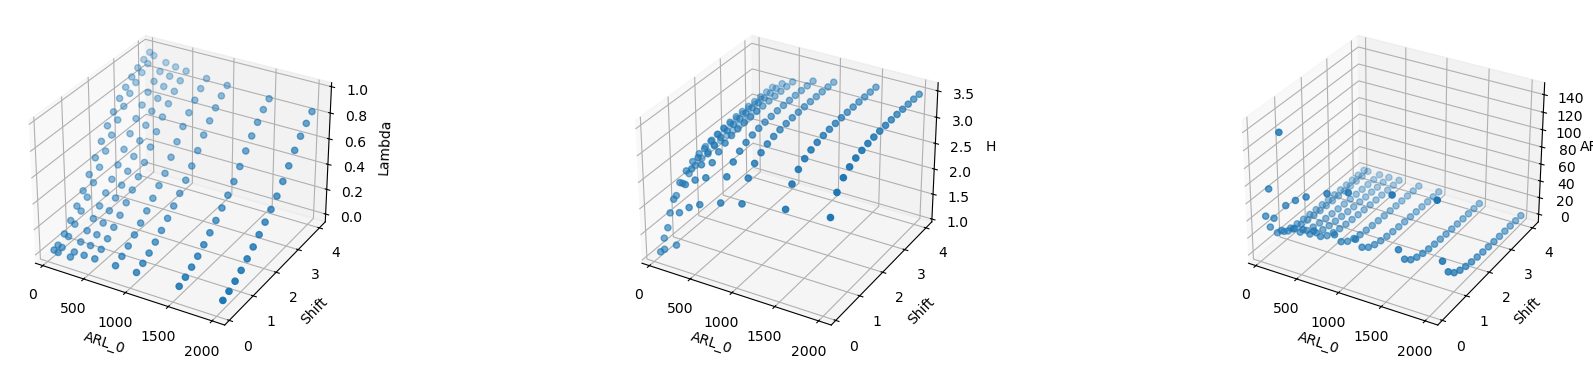

             ARL_0       Shift      Lambda           H        ARL1
count   147.000000  147.000000  147.000000  147.000000  147.000000
mean    712.380952    2.083673    0.431907    2.846567   11.693817
std     629.551192    1.180030    0.300861    0.500289   22.786099
min      50.000000    0.100000    0.005750    1.115437    1.049236
25%     250.000000    1.000000    0.150766    2.563459    1.703638
50%     500.000000    2.000000    0.398042    2.983023    3.178576
75%    1000.000000    3.000000    0.716447    3.208034    8.769937
max    2000.000000    4.000000    0.960498    3.480321  143.109650


In [6]:
# Cell 10 - Load and plot Quality data
#
from IPython.display import display, HTML, Latex
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

display(HTML("<h2>Quality Control Data</h2>"))
qc=pd.read_excel('OptimalEwma.xlsx', sheet_name='Sheet1')
qc.rename(index=str,columns={" ARL_0":"ARL_0"," Shift":"Shift"," Lambda":"Lambda"," H":"H"," ARL1":"ARL1"})
qc=qc.dropna(axis=0,how='any')
qc.describe()
qc.columns

fig=plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
ax=fig.add_subplot(131,projection='3d')
ax.scatter(qc[' ARL_0'],qc[' Shift'],qc[' Lambda'])
ax.set_xlabel('ARL_0')
ax.set_ylabel('Shift')
ax.set_zlabel('Lambda')
#
ax=fig.add_subplot(132,projection='3d')
ax.scatter(qc[' ARL_0'],qc[' Shift'],qc[' H'])
ax.set_xlabel('ARL_0')
ax.set_ylabel('Shift')
ax.set_zlabel('H')
#
ax=fig.add_subplot(133,projection='3d')
ax.scatter(qc[' ARL_0'],qc[' Shift'],qc[' ARL1'])
ax.set_xlabel('ARL_0')
ax.set_ylabel('Shift')
ax.set_zlabel('ARL1')
plt.show()

print(qc.describe())

In [7]:
# Cell 11 - Data Preparation

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#build the data arrays and scale
qcX=qc.drop(qc.columns[[2,3,4]],axis=1)
qcY=qc.drop(qc.columns[[0,1]],axis=1)
qc_scaler=MinMaxScaler()
X_scaled=qc_scaler.fit_transform(qcX,qcY)
qcX_train,qcX_test,qcY_train,qcY_test=train_test_split(X_scaled,qcY,test_size=0.25)
#create dataframes for training and testing datasets
foo={'ARL_0':qcX_train[:,0],'Shift':qcX_train[:,1]}
nn1_train_df=pd.DataFrame(data=foo)
nn1_train_df['Lambda']=qcY_train.values[:,0]
nn1_train_df['H']=qcY_train.values[:,1]
nn1_train_df['ARL1']=qcY_train.values[:,2]
foo={'ARL_0':qcX_test[:,0],'Shift':qcX_test[:,1]}
nn1_test_df=pd.DataFrame(data=foo)
nn1_test_df['Lambda']=qcY_test.values[:,0]
nn1_test_df['H']=qcY_test.values[:,1]
nn1_test_df['ARL1']=qcY_test.values[:,2]


In [8]:
# Cell 12 - Neural Network Definition and Training

from sklearn.neural_network import MLPRegressor

# define and fit the neural network model
nn1=MLPRegressor(hidden_layer_sizes=(15,),
                activation='logistic',
                solver='sgd',
                max_iter=5000,
                early_stopping=True)
nn1.fit(qcX_train,qcY_train)

MLPRegressor(activation='logistic', early_stopping=True,
             hidden_layer_sizes=(15,), max_iter=5000, solver='sgd')

The neural network trained for 53 epochs
R^2 value for the training set is 0.040580
R^2 value for the test set is 0.014988
MSE for Lambda (training): 0.09
MSE for H (training): 0.23
MSE for ARL1 (training): 573.66
MSE for Lambda (test): 0.09
MSE for H (test): 0.22
MSE for ARL1 (test): 337.89
Mean absolute error for Lambda (training): 0.26
Mean absolute error for H (training): 0.37
Mean absolute error for ARL1 (training): 13.86
Mean absolute error for Lambda (test): 0.27
Mean absolute error for H (test): 0.38
Mean absolute error for ARL1 (test): 11.09


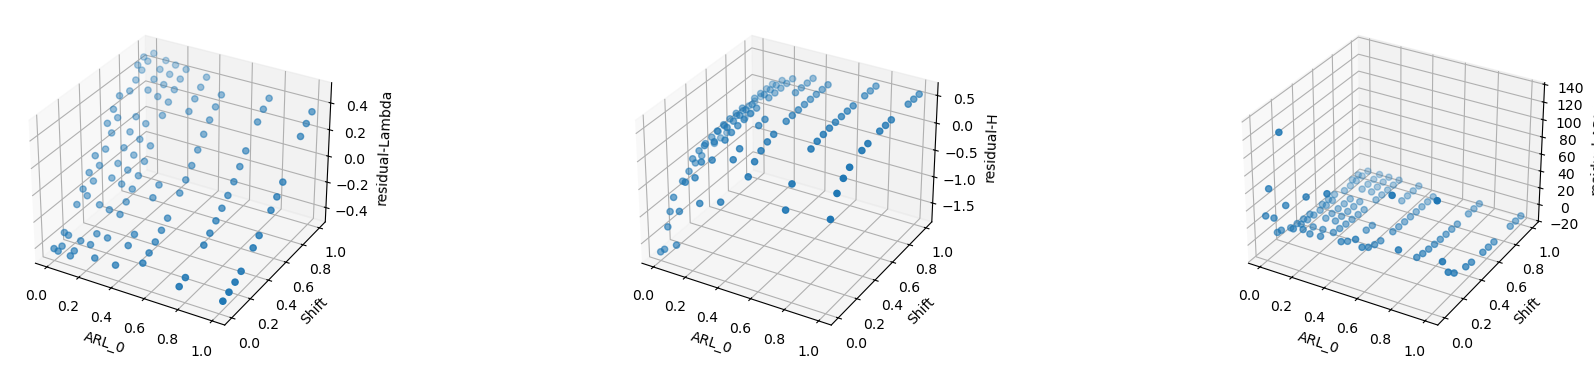

In [9]:
# Cell 13 - Evaluate the trained neural network
from sklearn.metrics import mean_absolute_error

#
nn1_train_pred=nn1.predict(qcX_train)
nn1_train_df['Pred_Lambda']=nn1_train_pred[:,0]
nn1_train_df['Pred_H']=nn1_train_pred[:,1]
nn1_train_df['Pred_ARL1']=nn1_train_pred[:,2]
nn1_train_df['resid_Lambda']=nn1_train_df['Lambda']-nn1_train_df['Pred_Lambda']
nn1_train_df['resid_H']=nn1_train_df['H']-nn1_train_df['Pred_H']
nn1_train_df['resid_ARL1']=nn1_train_df['ARL1']-nn1_train_df['Pred_ARL1']
#
nn1_test_pred=nn1.predict(qcX_test)
nn1_test_df['Pred_Lambda']=nn1_test_pred[:,0]
nn1_test_df['Pred_H']=nn1_test_pred[:,1]
nn1_test_df['Pred_ARL1']=nn1_test_pred[:,2]
nn1_test_df['resid_Lambda']=nn1_test_df['Lambda']-nn1_test_df['Pred_Lambda']
nn1_test_df['resid_H']=nn1_test_df['H']-nn1_test_df['Pred_H']
nn1_test_df['resid_ARL1']=nn1_test_df['ARL1']-nn1_test_df['Pred_ARL1']
# report R2 values
print("The neural network trained for %d epochs"%(nn1.n_iter_))
print("R^2 value for the training set is %f"%(nn1.score(qcX_train,qcY_train)))
print("R^2 value for the test set is %f"%(nn1.score(qcX_test,qcY_test)))
print("MSE for Lambda (training): %.2f"% np.mean((nn1_train_df['resid_Lambda']) ** 2))
print("MSE for H (training): %.2f"% np.mean((nn1_train_df['resid_H']) ** 2))
print("MSE for ARL1 (training): %.2f"% np.mean((nn1_train_df['resid_ARL1']) ** 2))
print("MSE for Lambda (test): %.2f"% np.mean((nn1_test_df['resid_Lambda']) ** 2))
print("MSE for H (test): %.2f"% np.mean((nn1_test_df['resid_H']) ** 2))
print("MSE for ARL1 (test): %.2f"% np.mean((nn1_test_df['resid_ARL1']) ** 2))
print("Mean absolute error for Lambda (training): %.2f"%mean_absolute_error(nn1_train_df['Lambda'],nn1_train_df['Pred_Lambda']))
print("Mean absolute error for H (training): %.2f"%mean_absolute_error(nn1_train_df['H'],nn1_train_df['Pred_H']))
print("Mean absolute error for ARL1 (training): %.2f"%mean_absolute_error(nn1_train_df['ARL1'],nn1_train_df['Pred_ARL1']))
print("Mean absolute error for Lambda (test): %.2f"%mean_absolute_error(nn1_test_df['Lambda'],nn1_test_df['Pred_Lambda']))
print("Mean absolute error for H (test): %.2f"%mean_absolute_error(nn1_test_df['H'],nn1_test_df['Pred_H']))
print("Mean absolute error for ARL1 (test): %.2f"%mean_absolute_error(nn1_test_df['ARL1'],nn1_test_df['Pred_ARL1']))
#
fig=plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
ax=fig.add_subplot(131,projection='3d')
ax.scatter(nn1_train_df['ARL_0'],nn1_train_df['Shift'],nn1_train_df['resid_Lambda'])
ax.set_xlabel('ARL_0')
ax.set_ylabel('Shift')
ax.set_zlabel('residual-Lambda')
#
ax=fig.add_subplot(132,projection='3d')
ax.scatter(nn1_train_df['ARL_0'],nn1_train_df['Shift'],nn1_train_df['resid_H'])
ax.set_xlabel('ARL_0')
ax.set_ylabel('Shift')
ax.set_zlabel('residual-H')
#
ax=fig.add_subplot(133,projection='3d')
ax.scatter(nn1_train_df['ARL_0'],nn1_train_df['Shift'],nn1_train_df['resid_ARL1'])
ax.set_xlabel('ARL_0')
ax.set_ylabel('Shift')
ax.set_zlabel('residual-ARL1')
plt.show()